# Introduction

## Getting Started

The first step in testing the forecaster library is to import a data set. The forecaster library includes an example
data set from a prior project on PV power production. The data set includes 24 hour forecasts for the following
* Ambient temperature (Tamb_forecast_x)
* Clear sky irradiation (clear_sky_forecast_x)
* Cloud cover (cloud_cover_forecast_x)
* PV production from the prior day (Ppv_dminus1_forecast_x)
* Actual PV production (Ppv_forecast_x)

where 'x' is the hour of the forecast.

In [1]:
import os
import pandas as pd

cwd = os.getcwd()
folder = os.path.join(cwd, '..', 'resources', 'data')

data = pd.read_csv(os.path.join(folder, 'forecaster_example_data.csv'), index_col = 0)
data.index = pd.to_datetime(data.index)
display(data)

,Tamb_forecast_1,Tamb_forecast_2,Tamb_forecast_3,Tamb_forecast_4,Tamb_forecast_5,Tamb_forecast_6,Tamb_forecast_7,Tamb_forecast_8,Tamb_forecast_9,Tamb_forecast_10,...,Ppv_forecast_14,Ppv_forecast_15,Ppv_forecast_16,Ppv_forecast_17,Ppv_forecast_18,Ppv_forecast_19,Ppv_forecast_20,Ppv_forecast_21,Ppv_forecast_22,Ppv_forecast_23
2018-07-20 23:00:00,16.1,15.6,15.6,15.6,15.0,14.4,14.4,14.4,14.4,15.6,...,2586.524348,2466.131190,2191.011433,1733.403675,1144.791610,462.429508,144.616928,3.234688,0.000000,12.760208
2018-07-21 00:00:00,15.6,15.6,15.6,15.0,14.4,14.4,14.4,14.4,15.6,16.7,...,2466.131190,2191.011433,1733.403675,1144.791610,462.429508,144.616928,3.234688,0.000000,12.760208,1.048312
2018-07-21 01:00:00,15.6,15.6,15.0,14.4,14.4,14.4,14.4,15.6,16.7,18.3,...,2191.011433,1733.403675,1144.791610,462.429508,144.616928,3.234688,0.000000,12.760208,1.048312,0.000000
2018-07-21 02:00:00,15.6,15.0,14.4,14.4,14.4,14.4,15.6,16.7,18.3,20.0,...,1733.403675,1144.791610,462.429508,144.616928,3.234688,0.000000,12.760208,1.048312,0.000000,1.322876
2018-07-21 03:00:00,15.0,14.4,14.4,14.4,14.4,15.6,16.7,18.3,20.0,21.1,...,1144.791610,462.429508,144.616928,3.234688,0.000000,12.760208,1.048312,0.000000,1.322876,5.421722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-29 20:00:00,15.0,14.4,13.9,13.3,13.3,13.3,13.3,13.3,13.3,12.8,...,710.042912,1005.350732,1210.813040,1912.391214,2296.034456,1917.820778,1463.605638,831.925101,263.982510,13.276272
2018-08-29 21:00:00,14.4,13.9,13.3,13.3,13.3,13.3,13.3,13.3,12.8,12.8,...,1005.350732,1210.813040,1912.391214,2296.034456,1917.820778,1463.605638,831.925101,263.982510,13.276272,0.000000
2018-08-29 22:00:00,13.9,13.3,13.3,13.3,13.3,13.3,13.3,12.8,12.8,12.8,...,1210.813040,1912.391214,2296.034456,1917.820778,1463.605638,831.925101,263.982510,13.276272,0.000000,1.297032
2018-08-29 23:00:00,13.3,13.3,13.3,13.3,13.3,13.3,12.8,12.8,12.8,13.3,...,1912.391214,2296.034456,1917.820778,1463.605638,831.925101,263.982510,13.276272,0.000000,1.297032,0.000000


The forecasters library is stored as fcLib. It contains a 'forecasters' class which facilitates using the forecasters in the library. fcLib contains a list (forecaster_list) of details about each forecaster and the default parameters.

To initialize the forecasters library you must pass it a list of forecaster details. The previously specified forecaster_list provides those details from prior use in LBNL research projects.

To create an instance of the forecaster library using the default models and see information about
each forecaster you can use the following code. Note that the first lines add the src folder to the active python path, which may or may not be necessary depending on how your folders are arranged.

In [2]:
import sys
sys.path.append(os.path.join(cwd, '..'))
import fcLib

library = fcLib.forecasters(fcLib.forecaster_list)

To better understand the forecasters available in the library you can print out each key.

Notice that some of the forecasters are repeats (e.g. there are 4 versions of 'mlpregressor')
and some of the forecasters include common keywords. The repeat forecasters use different 
data pre-processing and hyperparameters. The keywords are as follows:
* pipeline: A scikit-learn pipeline with parameters as optimized by TPOT.
* tuned: A regressor with hyperparameters tuned by LBNL to yield low RMSE for a specific target in a specific data set.
* tuned-Total: The same as 'tuned', but matching multiple targets in a specific data set.
* tuned-Fast: The same as tuned-Total, but designed to accept 10% higher RMSE in exchange for faster processing times.
* no keyword: Uses default scikit-learn hyperparameters. Some models (e.g. time_of_week_temperature) have additional parameters on top of scikit-learn requirements.

To better understand the forecasters available in the library you can print out each entry of forecaster_list. Each entry is a dictionary containing information about a specific forecaster. The entries in the dictionaries are:
* fun: The name of the class in fcLib for that forecaster.
* parameter: The default parameters for that forecaster. The included parameters are in some cases required to use the forecaster, and in other cases are overwriting scikit-learn defaults. If a parameter is not specified the forecaster uses the scikit-learn default.
* description: A short description of the forecaster. More details are provided in the class description in fcLib.

Notice that some of the forecasters are repeats (e.g. there are 4 versions of 'mlpregressor') and some of the forecasters include common keywords. The repeat forecasters use different data pre-processing and hyperparameters. The keywords are as follows:

* pipeline: A scikit-learn pipeline with parameters as optimized by TPOT.
* tuned: A regressor with hyperparameters tuned by LBNL to yield low RMSE for a specific target in a specific data set.
* tuned-Total: The same as 'tuned', but matching multiple targets in a specific data set.
* tuned-Fast: The same as tuned-Total, but designed to accept 10% higher RMSE in exchange for faster processing times.
* no keyword: Uses default scikit-learn hyperparameters. Some models (e.g. time_of_week_temperature) have additional parameters on top of scikit-learn requirements.

In [3]:
for i in library.forecasters:
    display(i)

{'name': 'extra_trees_pipeline',
 'fun': 'extratreespipeline',
 'parameter': {'polynomialfeatures': {'include_bias': False},
  'extratrees': {'min_samples_split': 6,
   'min_samples_leaf': 2,
   'max_features': 0.4}},
 'requires_forecast': True,
 'description': "scikit-learn ExtraTreesRegressor pipeline as recommended by TPOT. \n                                       Pre-processes the data with scikit-learn's PolynomialFeatures. \n                                       Default values as recommended by TPOT."}

{'name': 'random_forest_pipeline',
 'fun': 'randomforestpipeline',
 'parameter': {'polynomialfeatures': {'interaction_only': False},
  'robustscaler': {},
  'randomforest': {'min_samples_split': 13,
   'min_samples_leaf': 5,
   'max_features': 0.25,
   'bootstrap': False}},
 'requires_forecast': True,
 'description': "scikit-learn RandomForestRegressor pipeline as recommended by TPOT.\n                                        Uses scikit-learn's PolynomialFeatures and robustscaler to pre-process\n                                        the data. Default parameters are as recommended by TPOT"}

{'name': 'multi_layer_perceptron',
 'fun': 'mlpregressor',
 'parameter': {},
 'requires_forecast': True,
 'description': 'scikit-learn MLPRegressor model with default parameters'}

{'name': 'tuned_mlp',
 'fun': 'mlpregressor',
 'parameter': {'hidden_layer_sizes': 500,
  'alpha': 0.00505,
  'max_iter': 5000,
  'momentum': 0.1},
 'requires_forecast': True,
 'description': 'scikit-learn MLPRegressor model parameters tuned to optimize results on \n                            several meters (average score) in Camp Parks, 2020 data set'}

{'name': 'tuned_Total_mlp',
 'fun': 'mlpregressor',
 'parameter': {'hidden_layer_sizes': 500, 'alpha': 0.01, 'max_iter': 5000},
 'requires_forecast': True,
 'description': 'scikit-learn MLPRegressor model parameters tuned to optimize results on \n                                  Total Load in Camp Parks, 2020 data set'}

{'name': 'tuned_Fast_mlp',
 'fun': 'mlpregressor',
 'parameter': {'hidden_layer_sizes': 300,
  'alpha': 0.00505,
  'max_iter': 5000,
  'shuffle': True,
  'random_state': None,
  'tol': 0.0001,
  'momentum': 0.5},
 'requires_forecast': True,
 'description': 'scikit-learn MLPRegressor model parameters tuned to yield high performance \n                                 Total Load in Camp Parks, 2020 data set with fast simulation times. This is\n                                 the fastest parameter set with r2 score > (tuned mlp - 0.02)'}

{'name': 'random_forest',
 'fun': 'randomforest',
 'parameter': {},
 'requires_forecast': True,
 'description': 'scikit-learn RandomForestRegressor model with default parameters'}

{'name': 'extra_trees',
 'fun': 'extratrees',
 'parameter': {},
 'requires_forecast': True,
 'description': 'scikit-learn ExtraTreesRegressor model with default parameters'}

{'name': 'gradient_boosting',
 'fun': 'gradientboosting',
 'parameter': {'targets': 'multiple',
  'GBR': {'max_depth': 3},
  'MultiOutputRegressor': {}},
 'requires_forecast': True,
 'description': 'scikit-learn GradientBoostingRegressor model with\n                                    default parameters. Uses scikit-learn MultiOutputRegressor\n                                    to enable predicting multi-target problems. Cannot predict\n                                    single target problems.'}

{'name': 'todt',
 'fun': 'time_of_day_temperature',
 'parameter': {'LR': {}, 'oat_col_identifier': 'Tamb_forecast'},
 'requires_forecast': False,
 'description': 'scikit-learn LinearRegression model with input data \n                       formatted to create individual regressions for each\n                       hour of the day.'}

{'name': 'towt',
 'fun': 'time_of_week_temperature',
 'parameter': {'LR': {},
  'number_bins': 6,
  'oat_col_identifier': 'Tamb_forecast',
  'target_col': 'Ppv_forecast_1'},
 'requires_forecast': False,
 'description': 'scikit-learn LinearRegression model with input data \n                       formatted to provide 1) outdoor temperature split into bins\n                       and 2) the time of the week.'}

{'name': 'sarimax',
 'fun': 'stats_sarimax',
 'parameter': {'order_1': 2,
  'order_2': 0,
  'order_3': 0,
  'seasonal_order_1': 0,
  'seasonal_order_2': 1,
  'seasonal_order_3': 1,
  'seasonal_order_4': 4,
  'trend': 'n',
  'full_output': 1,
  'callback': None,
  'return_params': False,
  'X_column_categories': ['Tamb_forecast',
   'clear_sky_forecast',
   'cloud_cover_forecast',
   'Ppv_dminus1_forecast']},
 'requires_forecast': False,
 'description': 'statsmodels SARIMAX seasonal forecasting algorithm using default parameters.'}

## Using the forecasters

To train and test the forecasters on the data set you can simply pass the data set to the forecasters
as if you were using a scikit-learn forecaster. We can calculate the rmse on the sample data set using
the following steps.
* Break the dataframe into y (real PV production, Ppv_forecast_1) and X (the weather parameters)
* Split the dataframe into training and testing portions
* Iterating through each model in the library
* Fitting the model to the training data set
* Predicting the PV production for all times in the testing data set
* Calculating RMSE

The sample data set contains 24 hours forecasts (x data) and PV power (y data) for each hour in the forecast. This means that we can treat the data set as a multi-target problem, with each forecaster predicting 24 hours of PV production at each timestamp. To do so we pass the full X and y data sets, informing the forecasters that they need to receive 24 hr forecasts and predict 24 hr production.

The time_of_week_temperature model is specifically designed to predict building load using data sets with sub-hourly timesteps. Since the sample data set is for PV production using hourly data sets that forecaster does not perform well, and have been removed from the example code.

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into X and y
X_columns = [col for col in data.columns if not 'Ppv_forecast' in col]
X = data[X_columns]
y_columns = [col for col in data.columns if 'Ppv_forecast' in col]
y = data[y_columns]

# Create training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 42)

# Create a dataframe to store the rmse of each forecaster on this testing data
forecaster_names = [forecaster['name'] for forecaster in library.forecasters]
forecaster_names.remove('towt')
scores = pd.DataFrame(index = forecaster_names, columns = ['RMSE'])

# Iterate through each of the models
for forecaster in library.forecasters:

    if forecaster['name'] == 'towt':
        continue
    
    # Fit the model to the training data and predict for the testing data
    model = getattr(fcLib, forecaster['fun'])(**forecaster['parameter'])

    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    
    # Calculate the rmse and store it in the scores data frame
    rmse = np.sqrt(mean_squared_error(y_test, predict))
    scores.loc[forecaster['name'], 'RMSE'] = rmse

display(scores)

C:\Users\Peter\AppData\Roaming\Python\Python39\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


,RMSE
extra_trees_pipeline,198.047843
random_forest_pipeline,223.197292
multi_layer_perceptron,243.619482
tuned_mlp,221.87962
tuned_Total_mlp,216.240236
tuned_Fast_mlp,222.114771
random_forest,195.326806
extra_trees,197.314808
gradient_boosting,197.499672
todt,288.079003


To predict the upcoming PV production for the following 24 hours you need to pass them a weather forecast in the same format as the training data. The following code shows an example that plots 24 hour predctions from each forecaster using the following steps:
* Obtain the forecast by extracting data from a single row of the original data set
* Create a date range and a y_real dataset for plotting purposes
* Plot the real PV production data
* Iterate through each forecaster
* Predict the PV production for that forecaster given the current weather forecast
* Plot the prediction

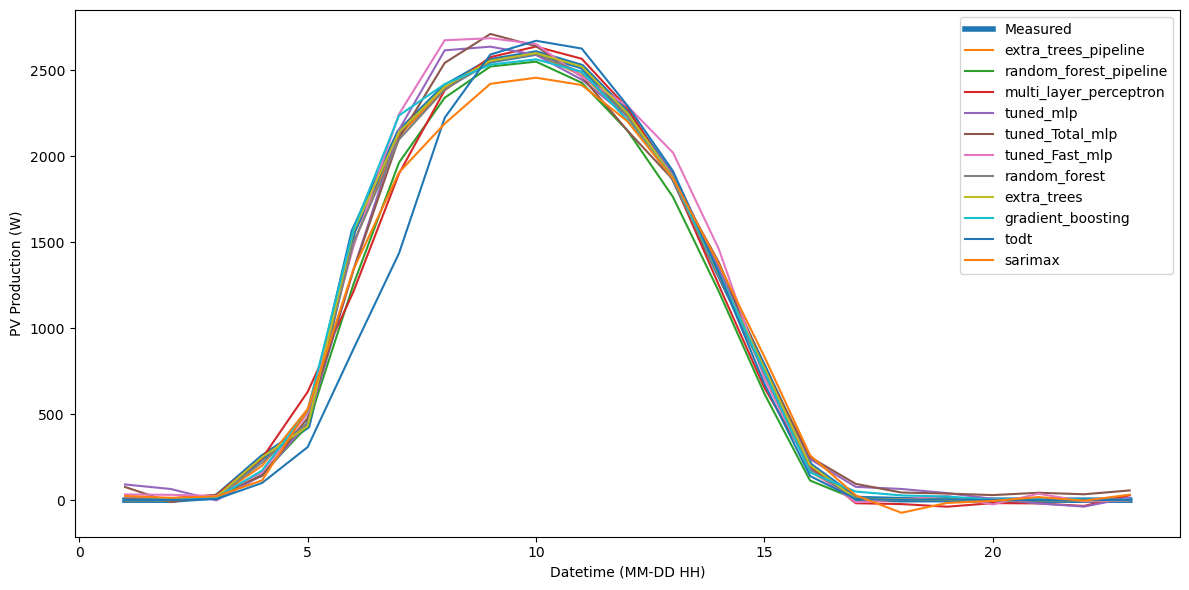

In [5]:
ix = 100 # Test on the 100th entry in the data set

parameters = np.unique([col.rsplit('_', 1)[0] + '_1' for col in X.columns])

forecast = pd.DataFrame(columns = X_columns)
forecast.loc[X.index[ix]] = X.loc[X.index[ix]]
y_real = pd.DataFrame(columns = y_columns)
y_real.loc[y.index[ix]] = y.loc[y.index[ix]]

import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12, 6))

x = range(1, 24)
plt.plot(x, y_real.T, label = 'Measured', linewidth = 4)

for forecaster in library.forecasters:
    if forecaster['name'] == 'towt':
        continue
    
    model = getattr(fcLib, forecaster['fun'])(**forecaster['parameter'])
    model.fit(X_train, y_train)

    predict = model.predict(forecast)
    plt.plot(x, predict.T, label = forecaster['name'])
        
plt.xlabel('Datetime (MM-DD HH)')
plt.ylabel('PV Production (W)')
plt.legend()
plt.tight_layout()

## Tuning the forecasters

fcLib.forecasters includes a function to tune the hyperparameters for several of the forecasters. That function can be called using the fcLib.forecasters.tune_hyperparameters() function. The inputs to tune_hyperparameters are:
* X: The X data set to be used in hyperparameter tuning.
* y: The y data set to be used in hyperparameter tuning.
* method: The search method to be used. Options are 'grid_smal', 'grid_large' and 'randomized'.
* cv: The number of folds to use when performing cross-validation.
* n_forecasters: The number of tuned forecasters to include in the output list.
* n_jobs: The number of cores to use when performing the hyperparameter tuning.
* n_iter (optional): The number of iterations to use when performing randomized search.
* random_state (optional): The random state to use when perfoming randomized search.

The three search options are: 1) 'grid_small', 'grid_large', and 'randomized'. 'grid_small' and 'grid_large' both use scikit-learns GridSearch CV. 'randomized' uses scikit-learn's RandomizedSearchCV tool.

Both 'grid' options perform a grid search over hyperparameter options specified for each forecaster. The hyperparameter options are stored in the 'search_parameters' attribute of the tuneable classes. That attribute can be edited as desired for specific applications. 'grid_small' is designed to complete in about 30 minutes when using 4 processes on a modern (2022) laptop. 'grid_large' searches over a larger parameter space, and is designed to complete in about 90 minutes.

'randomized' performs a specified number of iterations for each forecaster, and calls randomization functions to determine the hyperparameters in each iteration. The size of the parameter space and processing time are both determined by the number of  iterations specified when calling the function.

n_forecasters states the number of tuned forecasters to return in the output. tune_hyperparameters keeps the best performing n_forecasters models. Note that tune_hyperparameters also retains the non-tunable forecasters, so the final output will be larger than n_forecasters.

In [6]:
library.tune_hyperparameters(X, y, method = 'grid_small', cv = 4, n_forecasters = 5, n_jobs = 4)

Performing the grid search creates new attributes that store the forecasters with tuned parameters. The new attribute 'tuned_forecasters' provides a list of dictionaries with the name of the function, the parameters, and a quick description of the forecaster. 'tuned_models' stores a dictionary of the initialized models.

Not all forecasters in the library are tunable. Models such as time_of_week_temperature don't have enough tunable parameters to include. The TPOT pipelines are considered optimized as they are, and are excluded. These forecasters are copied into the 'tuned_' attributes so they can still be used.

Note that, since some forecasters in the library are duplicates with different parameters, there are fewer forecasters in the 'tuned_' sets than in the untuned sets. For instance, the four different implementations of MLPRegressor in the original set are reduced to a single instance of MLPRegrssor in the 'tuned_' set.

If you want to see the details of the tuned forecasters you can print out the list as before.

In [7]:
for i in library.tuned_forecasters:
    display(i)

{'name': 'randomforest_autotuned',
 'fun': 'randomforest',
 'parameter': {'max_features': 8, 'min_samples_split': 2, 'n_estimators': 600},
 'description': 'randomforest with hyperparameters tuned using self.tune_forecasters()'}

{'name': 'extratrees_autotuned',
 'fun': 'extratrees',
 'parameter': {'max_features': 8, 'min_samples_split': 2, 'n_estimators': 600},
 'description': 'extratrees with hyperparameters tuned using self.tune_forecasters()'}

{'name': 'mlpregressor_autotuned',
 'fun': 'mlpregressor',
 'parameter': {'hidden_layer_sizes': 300, 'max_iter': 400, 'momentum': 0.1},
 'description': 'mlpregressor with hyperparameters tuned using self.tune_forecasters()'}

{'name': 'gradientboosting_autotuned',
 'fun': 'gradientboosting',
 'parameter': {'MultiOutputRegressor': {},
  'GBR': {'max_depth': 5, 'n_estimators': 50}},
 'description': 'gradientboosting with hyperparameters tuned using self.tune_forecasters()'}

{'name': 'stats_sarimax_autotuned',
 'fun': 'stats_sarimax',
 'parameter': {'order_1': 1,
  'order_2': 0,
  'order_3': 0,
  'seasonal_order_1': 0,
  'seasonal_order_2': 1,
  'seasonal_order_3': 1,
  'seasonal_order_4': 5,
  'full_output': 1,
  'callback': None,
  'return_params': False,
  'trend': 'n',
  'X_column_categories': ['Tamb_forecast',
   'clear_sky_forecast',
   'cloud_cover_forecast',
   'Ppv_dminus1_forecast']},
 'description': 'stats_sarimax with hyperparameters tuned using self.tune_forecasters()'}

We can then plot the predicted PV production for the same weather forecast with the forecasters using the same methods as before. The only difference is that the code now uses each entry in 'tuned_models' instead of 'models'.

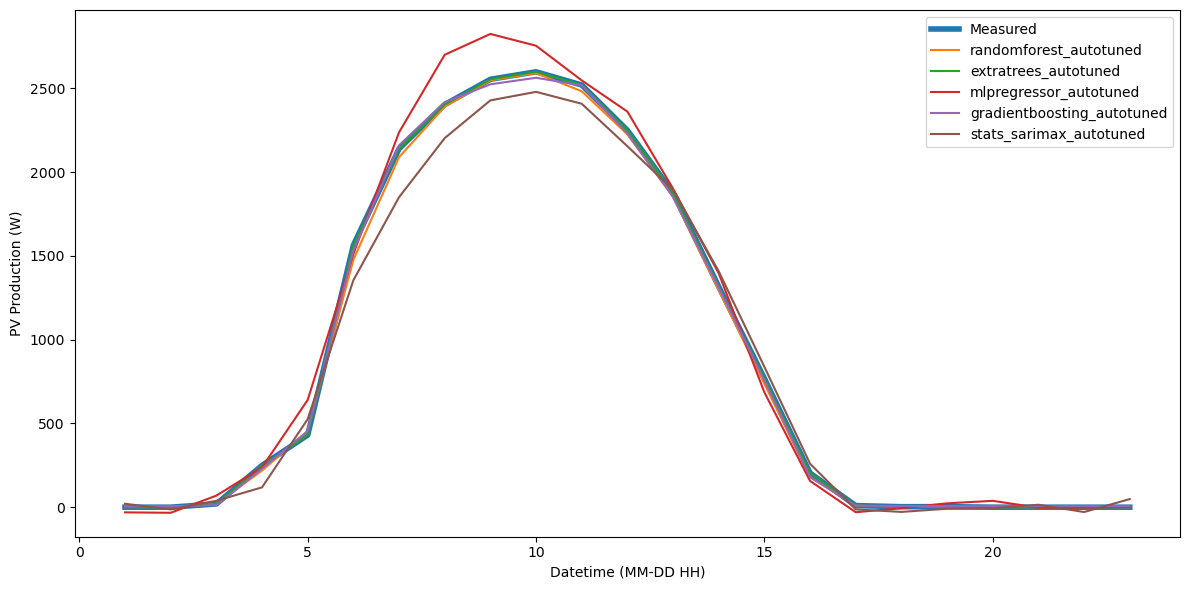

In [8]:
fig = plt.figure(figsize = (12, 6))
plt.plot(x, y_real.T, label = 'Measured', linewidth = 4)

for forecaster in library.tuned_forecasters:
    
    model = getattr(fcLib, forecaster['fun'])(**forecaster['parameter'])

    model.fit(X_train, y_train)
    predict = model.predict(forecast)
    plt.plot(x, predict[0], label = forecaster['name'])

plt.legend()
plt.xlabel('Datetime (MM-DD HH)')
plt.ylabel('PV Production (W)')
plt.tight_layout()